# Project 2 - Moneyball

## The Question

We want to understand how efficient teams have been historically at spending money and getting wins in return. In the case of Moneyball, one would expect that Oakland was not much more efficient than other teams in their spending before 2000, were much more efficient (they made a movie about it after all) between 2000 and 2005, and by then other teams may have caught up. Your job in this project is to see how this is reflected in the data we have.

## Part 1: Wrangling

The data you need to answer these questions is in the Salaries and Teams tables of the database.

#### Problem 1

**Using an SQL query only** compute a relation containing the total payroll and winning percentage (number of wins / number of games * 100) for each team (that is, for each teamID and yearID combination). You should include other columns that will help when performing EDA later on (e.g., franchise ids, number of wins, number of games).

**Hint:** Take a good look at the [SQLite Documentation](https://www.sqlitetutorial.net/).

Include as a cell the SQL code you used to create this relation. As a markdown cell, describe how you dealt with any missing data in these two relations. Specifically, indicate if there is missing data in either table, and how the type of join you used determines how you dealt with this missing data. 

**You must display the head of the resulting data table in your notebook.  You should also display the results of one team over the time range to make sure your data is correct.**

**Hint:** For SQL you have to be mindful of integer vs. float division.  See the above tutorial on how to deal with this.

In [2]:
# Import Statements
import sqlite3
import pandas


In [87]:

sql2016_file = './baseball-archive-sqlite-master/lahman2016.sqlite'
conn = sqlite3.connect(sql2016_file)

# salary_query = """SELECT teamID, yearID, W, G, CAST(W AS float)/CAST(G AS float)*100
# AS 'WinPercentage'
# FROM Teams
# INNER JOIN Salaries
# ON Teams.teamID = Salaries.teamID AND Teams.yearID = Salaries.yearID"""

# add columns to this query as needed for the subsequent EDA
my_query = """
SELECT * FROM

(SELECT teamID, yearID, W, G, CAST(W AS float)/CAST(G AS float)*100 
AS 'WinPercentage'
FROM Teams) a
INNER JOIN
(SELECT sum(salary) AS total_payroll, yearID AS d_yearID, teamID AS d_teamID
FROM Salaries GROUP BY yearID) b

ON a.teamID = b.d_teamID AND a.yearID = b.d_yearID
"""

payroll_winpercent = pandas.read_sql(my_query, conn)
desired_columns = ["teamID","yearID", "W", "G", "WinPercentage", "total_payroll"]

# pw_df = payroll_winpercent[desired_columns]
pw_df[pw_df["total_payroll"] > 0]
#pw_df
#payroll_winpercent["WinPercentage"].corr(payroll_winpercent['total_payroll'])

,teamID,yearID,W,G,WinPercentage,total_payroll
1917,BAL,1985,83,161,51.552795,1.907108e+09
1918,BOS,1985,81,163,49.693252,2.802350e+09
1919,CAL,1985,90,162,55.555556,2.719789e+08
1920,CHA,1985,85,163,52.147239,1.812239e+09
1921,CLE,1985,60,162,37.037037,1.566992e+09
1922,DET,1985,84,161,52.173913,2.138359e+09
1923,KCA,1985,91,162,56.172840,1.289574e+09
1924,MIN,1985,77,162,47.530864,1.480575e+09
1925,ML4,1985,71,161,44.099379,2.336458e+08
1926,NYA,1985,97,161,60.248447,3.495871e+09


In [ ]:
my_query2 = """
SELECT teamID, yearID, W, G, CAST(W AS float)/CAST(G AS float)*100 
AS 'WinPercentage'
FROM Teams
"""
my_query3 = """
SELECT sum(salary) AS total_payroll, yearID AS d_yearID, teamID AS d_teamID
FROM Salaries GROUP BY yearID
"""

## Part 2: Exploratory Data Analysis
## Payroll Distribution
### Problem 2
Write code to produce a plot that illustrate the distribution of payrolls across teams conditioned on time (from 1990-2014). This plot should be clear and interpretable.



In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

teamID           32
yearID           32
W                32
G                32
WinPercentage    32
total_payroll    32
dtype: int64

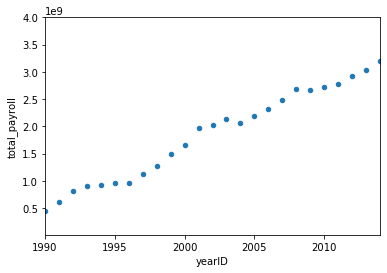

In [66]:
# Illustrate the distribution of payrolls across teams over time.
pw_df[pw_df["total_payroll"] > 0].plot.scatter(x = "yearID", y = "total_payroll", xlim = (1990, 2014), ylim = (1e7, 4e9))

#Note: my data only contains 32 entries with total payroll information, the rest are null values.
# I am not sure if I wrangled the data incorrectly or if the data is just very limitted
pw_df[pw_df["total_payroll"] > 0].count()

Write code to produce a scatter plot that shows winning percentage as a function of total payroll. That is, the total payroll on the x-axis and win percentage is on the y axis.

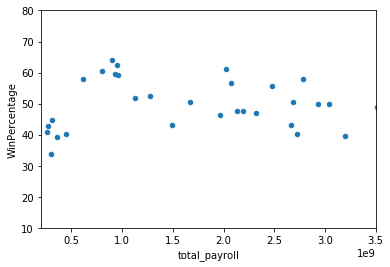

In [68]:
# Produces a scatter plot of total payroll vs win percentage
pw_df.plot.scatter(x = "total_payroll", y = "WinPercentage", xlim=(2e8,3.5e9), ylim = (10, 80))

### Question 1
What statements can you make about the distribution of payrolls conditioned on time based on these plots? Remember you can make statements in terms of central tendency, spread, and other statistics discussed in class.

### Answer
From these plots, we can tell that there is a strong positive correlation between the year and the total payroll. We can reinforce this statement by calculating the Pearson Correlation Coefficient below. Since the the coefficient is 0.99 we can say that the relationship is extremely strong. In other words, the year is a good way to predict the total payroll of a team.

In [73]:
relevant_data = pw_df[pw_df["total_payroll"] > 0]
relevant_data["total_payroll"].corr(relevant_data["yearID"])

0.9922214312801206

### Problem 3
Write code to produce plots that specifically show at least one of the statements you made in Question 1. For example, if you make a statement that there is a trend for payrolls to decrease over time, make a plot of a statistic for central tendency (e.g., mean payroll) vs. time to show that specifically.